# Biomonitoring of polycyclic aromatic hydrocarbon deposition in Greenland using historical herbarium bryophyte samples shows decrease in pollution during the 20th century

## Heatmaps

load libraries

In [1]:
library(scales)
library(superheat)
library(RColorBrewer)

load data

In [2]:
md <- read.table("MossData_LOQ.txt", sep = '\t', header = T, check.names = F)

In [3]:
head(md)

Sample,Species,Date,Decade,Industrial_Period,Naphthalene,Fluorene,Dibenzothiophene,Phenanthrene,Anthracene,⋯,C1-N,C2-N,C3-N,C4-N,C1-DBT,C2-DBT,C1-P,C2-P,2-MN,1-MN
<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
C-M 9902,Dicranum,1905,1920,Coal,346.4,<LOQ,<LOQ,145.5,<LOQ,⋯,<LOQ,<LOQ,95.2,<LOQ,59.0,<LOQ,105.2,<LOQ,<LOQ,<LOQ
C-M 9913,Racomitrium,1905,1920,Coal,952.0,<LOQ,<LOQ,140.1,<LOQ,⋯,<LOQ,<LOQ,<LOQ,<LOQ,<LOQ,<LOQ,87.4,<LOQ,<LOQ,<LOQ
C-M 9911,Racomitrium,1921,1920,Coal,<LOQ,36.4,75.6,1314.2,52.2,⋯,723.6,208.9,224.2,<LOQ,<LOQ,<LOQ,173.8,<LOQ,675.2,85.5
C-M 9912,Racomitrium,1925,1920,Coal,315.3,<LOQ,<LOQ,411.0,<LOQ,⋯,<LOQ,146.8,135.6,<LOQ,<LOQ,<LOQ,241.0,<LOQ,<LOQ,<LOQ
C-M 9879,Dicranum,1926,1920,Coal,339.5,<LOQ,<LOQ,285.9,<LOQ,⋯,<LOQ,120.4,96.2,<LOQ,<LOQ,<LOQ,193.4,249.5,158.0,<LOQ
C-M 9916,Hylocomium,1926,1920,Coal,79.1,<LOQ,<LOQ,91.1,<LOQ,⋯,<LOQ,<LOQ,<LOQ,<LOQ,<LOQ,<LOQ,85.1,<LOQ,<LOQ,<LOQ


### Heatmap ordered by species

prepare data

In [4]:
md <- md[order(md$Species),]

In [5]:
unique(md$Species)

[1] Dicranum    Hylocomium  Racomitrium
Levels: Dicranum Hylocomium Racomitrium

define colors for heatmap

In [6]:
my_palette <- colorRampPalette(brewer.pal(11, "RdYlGn"))(n = 15)
colpal <- hue_pal()(length(unique(md$Species))) 

create feature table (remove metadata columns)

In [7]:
data <- as.matrix(md[,c(6:ncol(md))])
rownames(data) <- md$Sample
class(data) <- 'numeric'

Warning message in class(data) <- "numeric":
“NAs introduced by coercion”

In [8]:
head(data)

,Naphthalene,Fluorene,Dibenzothiophene,Phenanthrene,Anthracene,Fluoranthene,Pyrene,Benzo(a)anthracene,Chrysene,Benzo[b]fluoranthene,⋯,C1-N,C2-N,C3-N,C4-N,C1-DBT,C2-DBT,C1-P,C2-P,2-MN,1-MN
C-M 9902,346.4,NA,NA,145.5,NA,36.8,27.5,NA,NA,NA,⋯,NA,NA,95.2,NA,59.0,NA,105.2,NA,NA,NA
C-M 9879,339.5,NA,NA,285.9,NA,124.0,78.0,6.4,45.0,NA,⋯,NA,120.4,96.2,NA,NA,NA,193.4,249.5,158.0,NA
C-M 9882,915.3,NA,NA,414.8,NA,145.9,98.7,9.5,37.6,NA,⋯,110.8,167.5,213.3,239.5,69.8,NA,298.5,375.4,75.7,NA
C-M 9895,501.1,NA,NA,411.9,NA,133.2,82.0,NA,NA,NA,⋯,215.7,206.7,206.6,NA,42.4,NA,207.8,NA,151.5,70.4
C-M 9898,893.3,49,NA,710.4,10.1,423.0,292.1,52.6,125.7,124.7,⋯,430.3,344.1,260.5,NA,49.8,NA,297.9,289.5,289.8,155.9
C-M 9881,201.3,NA,NA,596.6,NA,74.3,56.6,NA,NA,NA,⋯,NA,235.4,420.2,481.4,66.4,NA,574.7,393.6,NA,NA


[1] -1.0  0.3  2.0  3.0  5.0


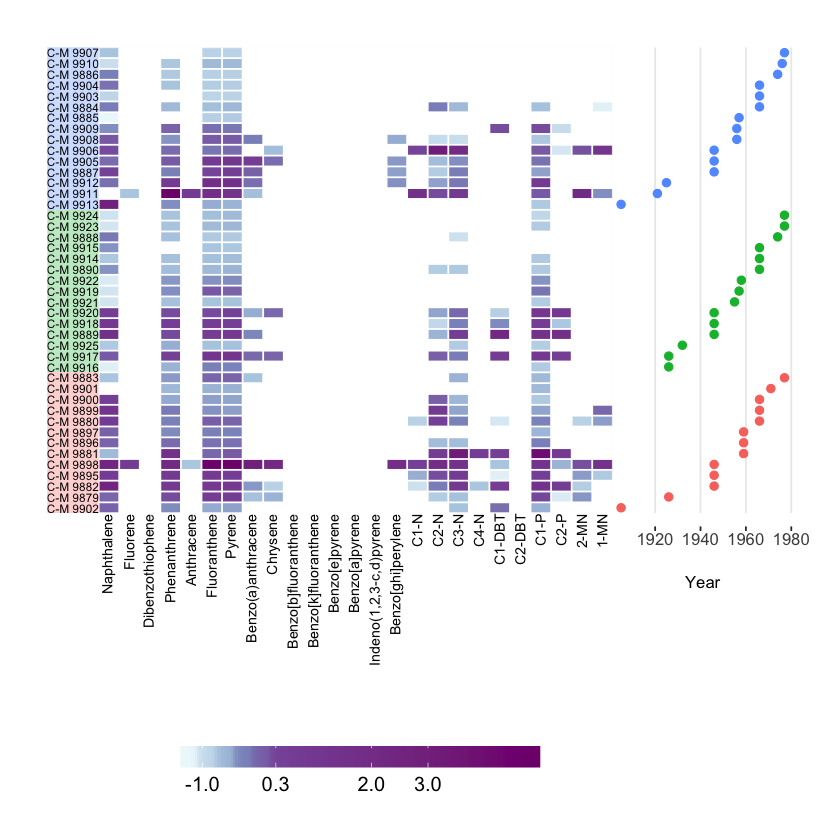

In [9]:
superheat(data,
          # set heatmap color map
          heat.pal = brewer.pal(5, "BuPu"),
          heat.na.col = "white",
          smooth.heat = TRUE,
          left.label.col = adjustcolor(colpal[as.numeric(as.factor(md$Species))], alpha.f = 0.3),
          scale = TRUE,
          # grid line colors
          grid.vline.col = "white",
          grid.hline.col = "white",
          # left labels
          left.label.size = 0.1,
          left.label.text.size = 2.5,
          # bottom labels
          force.bottom.label = TRUE,
          bottom.label.size = 0.5,
          bottom.label.text.size = 3,
          bottom.label.col = "white",
          bottom.label.text.angle = 90,
          bottom.label.text.alignment = "right",
          # top plot
          yr = md$Date,
          yr.plot.type = "scatter", 
          yr.axis.name = "Year",
          yr.plot.size = 0.35,
          yr.point.size = 2, 
          yr.obs.col = colpal[as.numeric(as.factor(md$Species))],
          legend = TRUE
 )

save figure to .pdf

In [10]:
pdf('Heatmap_Species_LOQ.pdf',width=10,height=10,onefile=FALSE) 
superheat(data,
          # set heatmap color map
          heat.pal = brewer.pal(5, "BuPu"),
          heat.na.col = "white",
          smooth.heat = TRUE,
          left.label.col = adjustcolor(colpal[as.numeric(as.factor(md$Species))], alpha.f = 0.3),
          scale = TRUE,
          # grid line colors
          grid.vline.col = "white",
          grid.hline.col = "white",
          # left labels
          left.label.size = 0.1,
          left.label.text.size = 2.5,
          # bottom labels
          force.bottom.label = TRUE,
          bottom.label.size = 0.5,
          bottom.label.text.size = 3,
          bottom.label.col = "white",
          bottom.label.text.angle = 90,
          bottom.label.text.alignment = "right",
          # top plot
          yr = md$Date,
          yr.plot.type = "scatter", 
          yr.axis.name = "Year",
          yr.plot.size = 0.35,
          yr.point.size = 2, 
          yr.obs.col = colpal[as.numeric(as.factor(md$Species))],
          legend = TRUE
 )
dev.off()

[1] -1.0  0.3  2.0  3.0  5.0


pdf 
  2

### Heatmap ordered by decade

prepare data

In [11]:
md <- md[order(md$Decade),]

In [12]:
unique(md$Decade)

[1] 1920 1940 1950 1960 1970

define colors for heatmap

In [13]:
my_palette <- colorRampPalette(brewer.pal(11, "RdYlGn"))(n = 15)
colpal <- hue_pal()(length(unique(md$Species))) 
colpal2 <- hue_pal()(length(unique(md$Decade))+3)[4:(length(unique(md$Decade))+3)] 

create feature table (remove metadata columns)

In [14]:
data <- as.matrix(md[,c(6:ncol(md))])
rownames(data) <- md$Sample
class(data) <- 'numeric'

Warning message in class(data) <- "numeric":
“NAs introduced by coercion”

[1] -1.0  0.3  2.0  3.0  5.0


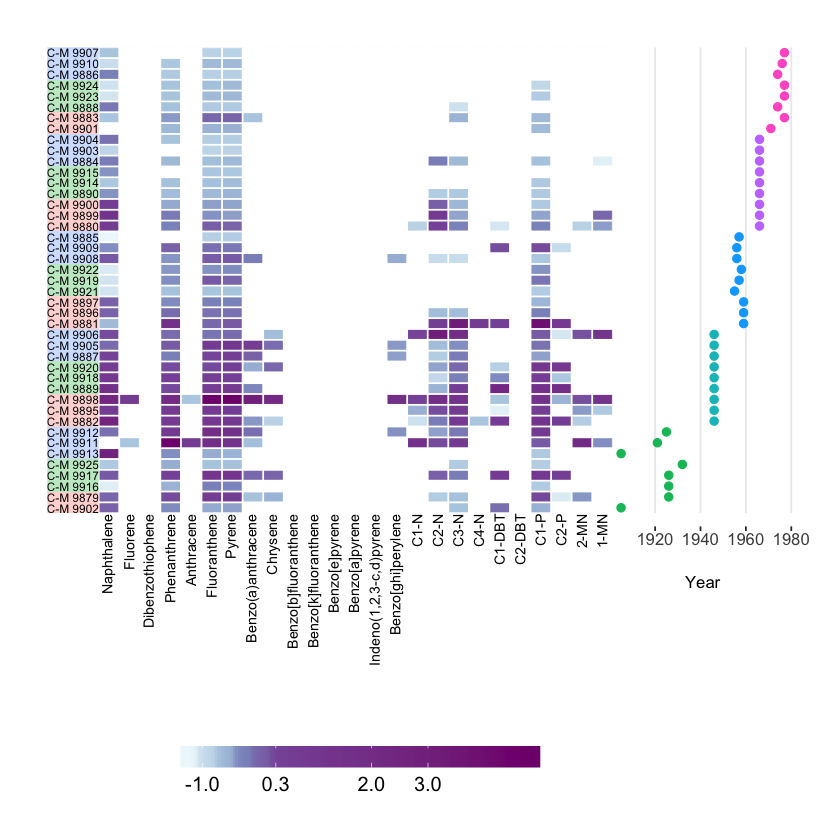

In [15]:
superheat(data,
          # set heatmap color map
          heat.pal = brewer.pal(5, "BuPu"),
          heat.na.col = "white",
          smooth.heat = TRUE,
          left.label.col = adjustcolor(colpal[as.numeric(as.factor(md$Species))], alpha.f = 0.3),
          scale = TRUE,
          # grid line colors
          grid.vline.col = "white",
          grid.hline.col = "white",
          # left labels
          left.label.size = 0.1,
          left.label.text.size = 2.5,
          # bottom labels
          force.bottom.label = TRUE,
          bottom.label.size = 0.5,
          bottom.label.text.size = 3,
          bottom.label.col = "white",
          bottom.label.text.angle = 90,
          bottom.label.text.alignment = "right",
          # top plot
          yr = md$Date,
          yr.plot.type = "scatter", 
          yr.axis.name = "Year",
          yr.plot.size = 0.35,
          yr.point.size = 2, 
          yr.obs.col = colpal2[as.numeric(as.factor(md$Decade))],
          legend = TRUE
 )

save figure to .pdf

In [16]:
pdf('Heatmap_Decade_LOQ.pdf',width=10,height=10,onefile=FALSE) 
superheat(data,
          # set heatmap color map
          heat.pal = brewer.pal(5, "BuPu"),
          heat.na.col = "white",
          smooth.heat = TRUE,
          left.label.col = adjustcolor(colpal[as.numeric(as.factor(md$Species))], alpha.f = 0.3),
          scale = TRUE,
          # grid line colors
          grid.vline.col = "white",
          grid.hline.col = "white",
          # left labels
          left.label.size = 0.1,
          left.label.text.size = 2.5,
          # bottom labels
          force.bottom.label = TRUE,
          bottom.label.size = 0.5,
          bottom.label.text.size = 3,
          bottom.label.col = "white",
          bottom.label.text.angle = 90,
          bottom.label.text.alignment = "right",
          # top plot
          yr = md$Date,
          yr.plot.type = "scatter", 
          yr.axis.name = "Year",
          yr.plot.size = 0.35,
          yr.point.size = 2, 
          yr.obs.col = colpal2[as.numeric(as.factor(md$Decade))],
          legend = TRUE
 )
dev.off()

[1] -1.0  0.3  2.0  3.0  5.0


pdf 
  2

# Analysis of variance (ANOVA) and Tukey Honest Significant Differences

load libraries

In [1]:
library(ggplot2)
library(multcompView)
library(plyr)
library(gridExtra)

define Tukey label function

In [2]:
# from: https://rdrr.io/github/DavidGarciaCallejas/DGC/man/GenerateLabelDf.html
generate_label_df <- function(HSD, flev){
    
  # Extract labels and factor levels from Tukey post-hoc 
  Tukey.levels <- HSD[[flev]][,4]
  Tukey.labels <- multcompLetters(Tukey.levels)['Letters']
  plot.labels <- names(Tukey.labels[['Letters']])
  
  # Get highest quantile for Tukey's 5 number summary and add a bit of space to buffer between    
  # upper quantile and label placement
  boxplot.df <- ddply(df, flev, function (x) max(fivenum(x$Chem)) + 100)
  
  # Create a data frame out of the factor levels and Tukey's homogenous group letters
  plot.levels <- data.frame(plot.labels, labels = Tukey.labels[['Letters']],
                            stringsAsFactors = FALSE)
  
  # Merge it with the labels
  labels.df <- merge(plot.levels, boxplot.df, by.x = 'plot.labels', by.y = flev, sort = FALSE)
  
  return(labels.df)
}

load data

In [3]:
md <- read.table("MossData_LOQ.txt", sep = '\t', header = T, stringsAsFactors = F, check.names = F)

In [4]:
head(md)

Sample,Species,Date,Decade,Industrial_Period,Naphthalene,Fluorene,Dibenzothiophene,Phenanthrene,Anthracene,⋯,C1-N,C2-N,C3-N,C4-N,C1-DBT,C2-DBT,C1-P,C2-P,2-MN,1-MN
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
C-M 9902,Dicranum,1905,1920,Coal,346.4,<LOQ,<LOQ,145.5,<LOQ,⋯,<LOQ,<LOQ,95.2,<LOQ,59.0,<LOQ,105.2,<LOQ,<LOQ,<LOQ
C-M 9913,Racomitrium,1905,1920,Coal,952.0,<LOQ,<LOQ,140.1,<LOQ,⋯,<LOQ,<LOQ,<LOQ,<LOQ,<LOQ,<LOQ,87.4,<LOQ,<LOQ,<LOQ
C-M 9911,Racomitrium,1921,1920,Coal,<LOQ,36.4,75.6,1314.2,52.2,⋯,723.6,208.9,224.2,<LOQ,<LOQ,<LOQ,173.8,<LOQ,675.2,85.5
C-M 9912,Racomitrium,1925,1920,Coal,315.3,<LOQ,<LOQ,411.0,<LOQ,⋯,<LOQ,146.8,135.6,<LOQ,<LOQ,<LOQ,241.0,<LOQ,<LOQ,<LOQ
C-M 9879,Dicranum,1926,1920,Coal,339.5,<LOQ,<LOQ,285.9,<LOQ,⋯,<LOQ,120.4,96.2,<LOQ,<LOQ,<LOQ,193.4,249.5,158.0,<LOQ
C-M 9916,Hylocomium,1926,1920,Coal,79.1,<LOQ,<LOQ,91.1,<LOQ,⋯,<LOQ,<LOQ,<LOQ,<LOQ,<LOQ,<LOQ,85.1,<LOQ,<LOQ,<LOQ


prepare data (replace <DL with 0 and transform values in mg/kg to ng/g)

In [5]:
md[,6:ncol(md)][md[,6:ncol(md)] == '<LOQ'] <- 0
md[,6:ncol(md)] <- apply(md[,6:ncol(md)],2,as.numeric)

In [6]:
head(md[,6:ncol(md)])

Naphthalene,Fluorene,Dibenzothiophene,Phenanthrene,Anthracene,Fluoranthene,Pyrene,Benzo(a)anthracene,Chrysene,Benzo[b]fluoranthene,⋯,C1-N,C2-N,C3-N,C4-N,C1-DBT,C2-DBT,C1-P,C2-P,2-MN,1-MN
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
346.4,0.0,0.0,145.5,0.0,36.8,27.5,0.0,0,0,⋯,0.0,0.0,95.2,0,59,0,105.2,0.0,0.0,0.0
952.0,0.0,0.0,140.1,0.0,35.9,22.1,0.0,0,0,⋯,0.0,0.0,0.0,0,0,0,87.4,0.0,0.0,0.0
0.0,36.4,75.6,1314.2,52.2,201.9,118.6,6.6,0,0,⋯,723.6,208.9,224.2,0,0,0,173.8,0.0,675.2,85.5
315.3,0.0,0.0,411.0,0.0,203.6,128.7,13.5,0,0,⋯,0.0,146.8,135.6,0,0,0,241.0,0.0,0.0,0.0
339.5,0.0,0.0,285.9,0.0,124.0,78.0,6.4,45,0,⋯,0.0,120.4,96.2,0,0,0,193.4,249.5,158.0,0.0
79.1,0.0,0.0,91.1,0.0,56.7,36.5,0.0,0,0,⋯,0.0,0.0,0.0,0,0,0,85.1,0.0,0.0,0.0


calculate summed values of all PAHs

In [7]:
md$PAHs <- rowSums(md[,6:ncol(md)])

select only compounds for ANOVA with at least 20 out of 43 samples with non-zero values

In [8]:
which(apply(md[,6:ncol(md)], 2, function(x) sum(as.numeric(x) != 0)) > 20)

Naphthalene Phenanthrene Fluoranthene       Pyrene         C2-N         C3-N 
           1            4            6            7           17           18 
        C1-P         PAHs 
          22           26

In [9]:
po <- names(which(apply(md[,6:ncol(md)], 2, function(x) sum(as.numeric(x) != 0)) > 20))

define groups

In [10]:
cat <- c("Species","Decade", "Industrial_Period")

compute ANOVA

In [11]:
out <- list()
for (i in 1:length(cat)){
    
    res <- c()
    
    for (j in 1:length(po)){
        
        df <- md[,c(cat[i],po[j])]
        df[,2] <- as.numeric(as.character(df[,2]))
        df[,2] <- log(df[,2]+1)
        df[,1] <- as.factor(df[,1])

        # Compute the analysis of variance
        res <- c(res,summary(aov(df[,2] ~ df[,1], data = df))[[1]][["Pr(>F)"]][1])
    }

    out[[i]] <- cbind(res,po,rep(cat[i],length(po)))
    
}

In [12]:
res_sum <- do.call("rbind", out)
colnames(res_sum) <- c("p-value","compound","metadata")

In [13]:
head(res_sum)

p-value,compound,metadata
0.780212406020995,Naphthalene,Species
0.0975288938394257,Phenanthrene,Species
0.140840441564133,Fluoranthene,Species
0.160178189211295,Pyrene,Species
0.121687941088269,C2-N,Species
0.054589674892691,C3-N,Species


adjust p-values for multiple comparisons

In [14]:
res_sum <- cbind(res_sum,p.adjust(res_sum[,1], method = "fdr"))
colnames(res_sum)[4] <- "ajdusted p-value"

save results to file

In [15]:
write.table(res_sum, "Anova_All_LOQ.txt", quote = F, row.names = F, sep = "\t")

plot significant results and add tukey labels

In [16]:
sig_all <- res_sum[which(res_sum[,4] <= 0.05),]

In [17]:
sig_all

p-value,compound,metadata,ajdusted p-value
0.0152986559040503,C1-P,Species,0.0244778494464805
0.0102368950801332,Phenanthrene,Decade,0.0175489629945141
0.00024002318564708,C2-N,Decade,0.000822936636504274
0.00172301017930344,C3-N,Decade,0.00375929493666205
0.00234326670060263,C1-P,Decade,0.00468653340120526
2.50290637367802e-05,PAHs,Decade,0.000100116254947121
0.000853241215757842,Phenanthrene,Industrial_Period,0.00227530990868758
0.00270312068226805,C2-N,Industrial_Period,0.00499037664418717
0.000276628471928886,C3-N,Industrial_Period,0.000829885415786658
0.00165273371339409,C1-P,Industrial_Period,0.00375929493666205


select which group to plot (e.g. Decade or Industrial_Period)

In [18]:
sig <- sig_all[sig_all[,3] == "Decade",]

In [19]:
sig

p-value,compound,metadata,ajdusted p-value
0.0102368950801332,Phenanthrene,Decade,0.0175489629945141
0.00024002318564708,C2-N,Decade,0.000822936636504274
0.00172301017930344,C3-N,Decade,0.00375929493666205
0.00234326670060263,C1-P,Decade,0.00468653340120526
2.50290637367802e-05,PAHs,Decade,0.000100116254947121


In [20]:
tuk <- list()
plots <- list()

for (i in 1:nrow(sig)){
    
    df <- md[,c(as.character(sig[i,3]),as.character(sig[i,2]))]
    
    colnames(df)[2] <- 'Chem'
    colnames(df)[1] <- 'Meta'
    df[,1] <- as.factor(df[,1])
    df_tuk <- df
    df_tuk[,2] <- log(df_tuk[,2]+1)
    
    m <- aov(Chem ~ Meta,data=df_tuk)
    tHSD <- TukeyHSD(m, ordered = FALSE, conf.level = 0.95)
    tuk[[i]] <- tHSD
    
    if (sig[i,3] == "Industrial_Period"){
        
        p <- ggplot(df, aes(x=Meta, y=Chem)) + 
            geom_boxplot(color='black') +
            geom_point(size=1,color='black')+
            xlab("") +
            annotate("text", x = c(1:length(unique(md$Industrial_Period))), y=0, label = paste("n=", as.vector(table(md$Industrial_Period)),sep=""),size=3) +
            ylab(paste(as.character(sig[i,2]),"[ng/g]", sep = " ")) 
    
        plots[[i]] <- p
        
    } else {
        
        p <- ggplot(df, aes(x=Meta, y=Chem)) + 
            geom_boxplot(color='black') +
            geom_text(data = generate_label_df(tHSD, 'Meta'), aes(x = plot.labels, y = V1, label = labels))+
            geom_point(size=1,color='black')+
            xlab("") +
            annotate("text", x = c(1:length(unique(md$Decade))), y=0, label = paste("n=", as.vector(table(md$Decade)),sep=""),size=3) +
            ylab(paste(as.character(sig[i,2]),"[ng/g]", sep = " ")) 
    
        plots[[i]] <- p
        
    }
}

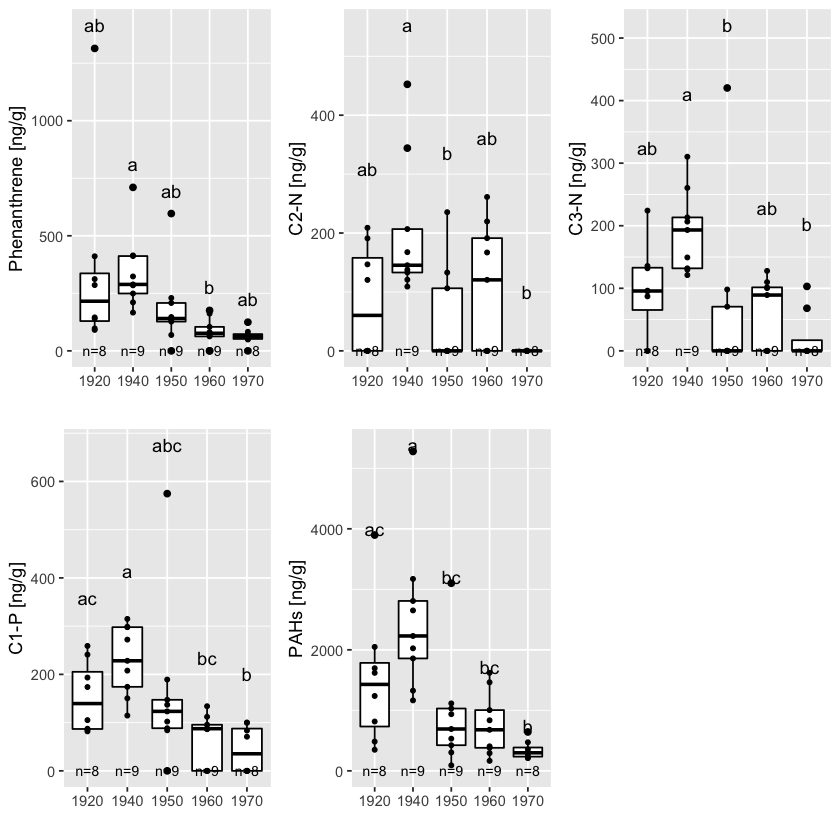

In [21]:
grid.arrange(grobs = plots, ncol = 3, widths = c(2,2,2))

In [22]:
pdf('Boxplots_significant_Decade_LOQ.pdf',width=10,height=10) 
grid.arrange(grobs = plots, ncol = 3, widths = c(2,2,2))
dev.off()

pdf 
  2

test for normal distributio of log transformed data

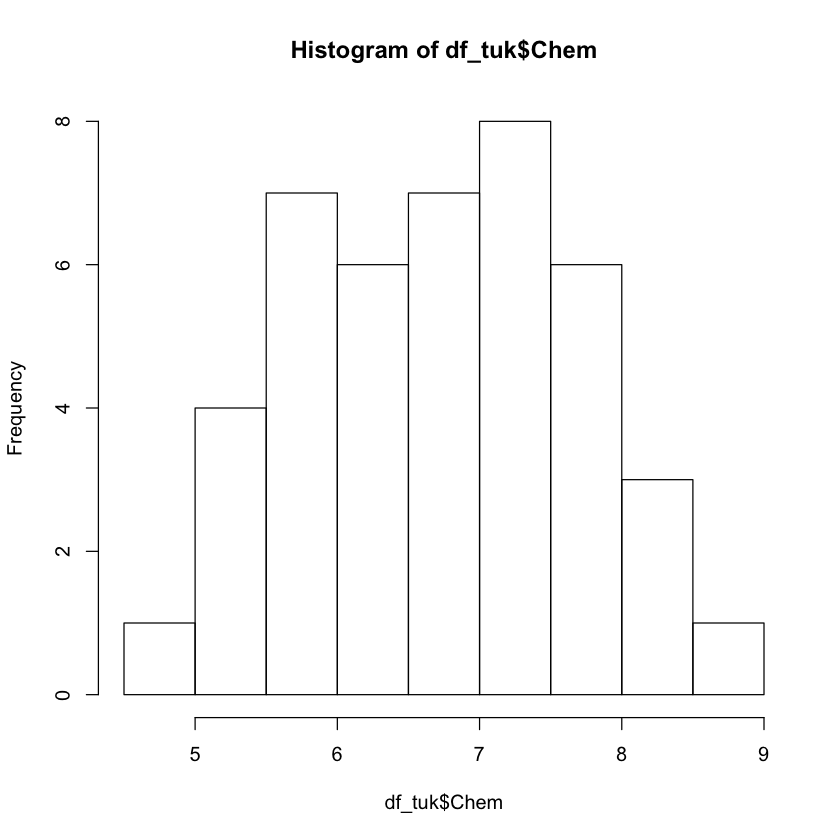

In [23]:
hist(df_tuk$Chem)

## Assess chemical diversity across all species and decades

load libraries

In [1]:
library(ggplot2)
library(vegan)
library(multcompView)
library(plyr)
library(gridExtra)

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-5


define Tukey label function

In [2]:
# from: https://rdrr.io/github/DavidGarciaCallejas/DGC/man/GenerateLabelDf.html
generate_label_df <- function(HSD, flev){
    
  # Extract labels and factor levels from Tukey post-hoc 
  Tukey.levels <- HSD[[flev]][,4]
  Tukey.labels <- multcompLetters(Tukey.levels)['Letters']
  plot.labels <- names(Tukey.labels[['Letters']])
  
  # Get highest quantile for Tukey's 5 number summary and add a bit of space to buffer between    
  # upper quantile and label placement
  boxplot.df <- ddply(df, flev, function (x) max(fivenum(x$Chem)) + 0.2)
  
  # Create a data frame out of the factor levels and Tukey's homogenous group letters
  plot.levels <- data.frame(plot.labels, labels = Tukey.labels[['Letters']],
                            stringsAsFactors = FALSE)
  
  # Merge it with the labels
  labels.df <- merge(plot.levels, boxplot.df, by.x = 'plot.labels', by.y = flev, sort = FALSE)
  
  return(labels.df)
}

load data

In [3]:
md <- read.table("MossData_LOQ.txt", sep = '\t', header = T, stringsAsFactors = F, check.names = F)

prepare data (replace <DL with 0 and transform values in mg/kg to ng/g)

In [4]:
md[,6:ncol(md)][md[,6:ncol(md)] == '<LOQ'] <- 0
md[,6:ncol(md)] <- apply(md[,6:ncol(md)],2,as.numeric)

define species

In [5]:
spec <- sort(as.character(unique(md$Species)))

In [6]:
spec <- "All" #c("All",spec)

create Bray-Curtis dissimilarity plots with tukey labels

In [7]:
plots <- list()

for (i in 1:length(spec)){
    
    if (spec[i] != "All"){
        data <- md[which(md$Species == spec[i]),]
    } else {
        data <- md
    }
    
    lev <- sort(as.character(unique(data$Decade)))
    
    bray <- list()
    
    for (j in 1:length(lev)){
        tab <- as.matrix(data[which(data$Decade == lev[j]),c(6:ncol(data))])
        class(tab) <- 'numeric'
        bray[[j]] <- vegdist(tab,method="bray")
    }
    
    braysum <- unlist(bray)
    df_n <- c()
    
    for (k in 1:length(bray)){
        df_n <- c(df_n,rep(lev[k],lengths(bray)[k]))
    }
    
    df <- cbind(braysum,df_n)
    df <- as.data.frame(df)
    df$braysum <- as.numeric(as.character(df$braysum))
    colnames(df) <- c("Chem","Meta")
    
    m <- aov(Chem ~ Meta,data=df)
    tHSD <- TukeyHSD(m, ordered = FALSE, conf.level = 0.95)
    
    zeros <- which(lengths(bray) == 0)
    nb <- length(bray)-length(zeros)
    
    p <- ggplot(df, aes(x=Meta, y=Chem)) + 
            geom_boxplot(color='black') +
            geom_text(data = generate_label_df(tHSD, 'Meta'), aes(x = plot.labels, y = V1, label = labels))+
            annotate("text", x = c(1:nb), y=0, label = paste("n=", lengths(bray),sep=""),size=3) +
            geom_point(size=1,color='black') +
            xlab("") +
            ylab("Bray-Curtis dissimilarity") +
            ggtitle(spec[i])
    
    plots[[i]] <- p

}

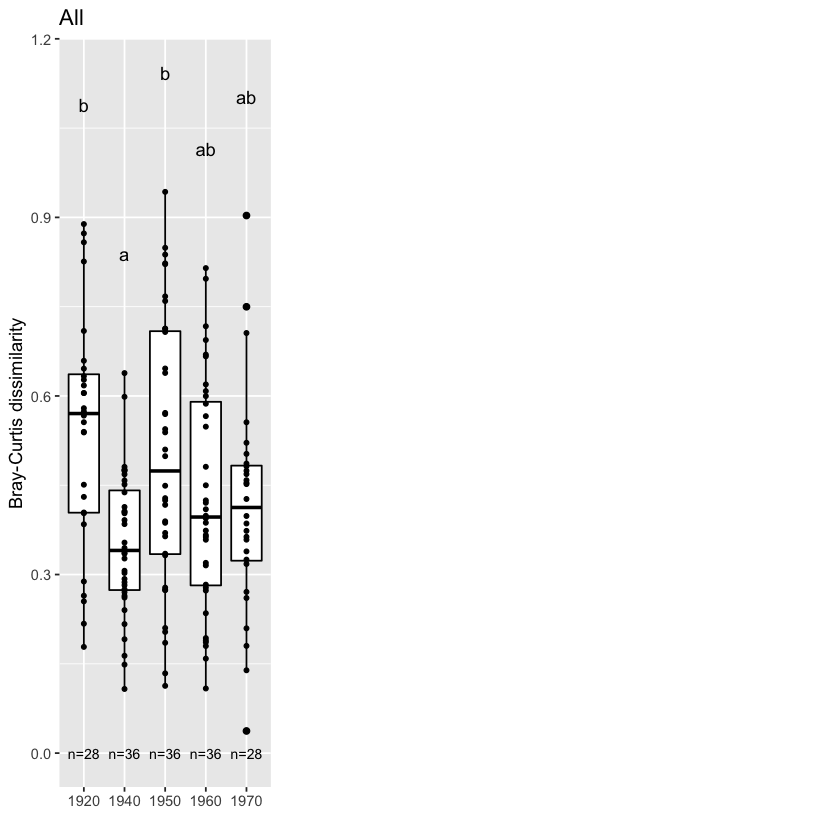

In [8]:
grid.arrange(grobs = plots, ncol = 3, widths = c(2,2,2))

In [9]:
pdf('Boxplots_BrayCurtis_LOQ.pdf',width=6,height=5) 
grid.arrange(grobs = plots, ncol = 1, widths = c(2))
dev.off()

pdf 
  2